# Code

In [1]:
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('scraper/omaha_house_price.csv')
df.head(10)

,price,beds,baths,sqft,sqftlot,broker,address
0,"$250,000",2bed,3bath,"2,596sqft","3,485sqft lot",Nebraska Realty,"915 S 119th Ct, Omaha, NE 68154"
1,"$90,000",5bed,3bath,"2,201sqft","7,405sqft lot",Keller Williams Greater Omaha,"4736 N 39th St, Omaha, NE 68111"
2,"$210,000",3bed,1.5bath,"1,774sqft",0.38acre lot,Nebraska Realty,"8006 Raven Oaks Dr, Omaha, NE 68152"
3,"$175,000",3bed,2bath,"1,436sqft","8,712sqft lot",NP Dodge - Sarpy County Branch Office,"3620 S 89th St, Omaha, NE 68124"
4,"$130,000",2bed,1bath,840sqft,"5,227sqft lot",Better Homes and Gardens Real Estate The Good ...,"6021 Hamilton St, Omaha, NE 68132"
5,"$149,950",1bed,1bath,555sqft,NaN,Milford Real Estate,"300 S 16th St Apt 506, Omaha, NE 68102"
6,"$205,000",3bed,2bath,"2,202sqft","9,100sqft lot",BHHS Ambassador Real Estate,"11061 Decatur St, Omaha, NE 68154"
7,"$125,000",1bed,1bath,840sqft,NaN,Better Homes and Gardens Real Estate The Good ...,"131 S 39th St Apt 18, Omaha, NE 68131"
8,"$115,000",4bed,2bath,"2,391sqft",0.25acre lot,Re/Max Real Estate Group Giles,"4825 S 16th St, Omaha, NE 68107"
9,"$130,000",3bed,1.5bath,"1,426sqft","4,792sqft lot",BHHS Ambassador Real Estate,"5836 S 136th St, Omaha, NE 68137"


In [3]:
df.shape

(2307, 7)

## Data Cleaning

In [5]:
df.isnull().sum()

price        0
beds        11
baths       14
sqft        20
sqftlot    107
broker      10
address      0
dtype: int64

In [6]:
df2 = df.dropna().copy()
df2.isnull().sum()

price      0
beds       0
baths      0
sqft       0
sqftlot    0
broker     0
address    0
dtype: int64

In [7]:
df2['beds'].unique()

array(['2bed', '5bed', '3bed', '4bed', '6bed', '1bed', '12bed', '7bed',
       '8bed'], dtype=object)

In [8]:
df2['baths'].unique()

array(['3bath', '1.5bath', '2bath', '1bath', '2.5bath', '3.5bath',
       '2.5+bath', '4.5bath', '1.5+bath', '3.5+bath', '4bath', '5bath',
       '5.5bath', '5.5+bath', '9bath', '4.5+bath', '6bath', '7bath',
       '8bath', '6.5bath', '6.5+bath', '7.5+bath', '8.5+bath'],
      dtype=object)

In [9]:
#removing extra characters
df2['price'] = df2['price'].apply(lambda x: float(x.replace("$","").replace(",","")))
df2['beds'] = df2['beds'].apply(lambda x: float(x.replace("bed","")))
df2['baths'] = df2['baths'].apply(lambda x: float(x.replace("+bath","").replace("bath","")))
df2['sqft'] = df2['sqft'].apply(lambda x: float(x.replace("sqft","").replace(",","")))

In [10]:
df2

,price,beds,baths,sqft,sqftlot,broker,address
0,250000.0,2.0,3.0,2596.0,"3,485sqft lot",Nebraska Realty,"915 S 119th Ct, Omaha, NE 68154"
1,90000.0,5.0,3.0,2201.0,"7,405sqft lot",Keller Williams Greater Omaha,"4736 N 39th St, Omaha, NE 68111"
2,210000.0,3.0,1.5,1774.0,0.38acre lot,Nebraska Realty,"8006 Raven Oaks Dr, Omaha, NE 68152"
3,175000.0,3.0,2.0,1436.0,"8,712sqft lot",NP Dodge - Sarpy County Branch Office,"3620 S 89th St, Omaha, NE 68124"
4,130000.0,2.0,1.0,840.0,"5,227sqft lot",Better Homes and Gardens Real Estate The Good ...,"6021 Hamilton St, Omaha, NE 68132"
...,...,...,...,...,...,...,...
2302,332875.0,4.0,3.0,2450.0,"7,579sqft lot",Bhhs Ambassador Real Estate,"9614 S 183rd Ave, Omaha, NE 68136"
2303,464485.0,3.0,2.5,3094.0,"7,405sqft lot",BHHS Ambassador Real Estate,"10702 S 127th Plz, Omaha, NE 68138"
2304,475228.0,4.0,3.0,2960.0,0.34acre lot,BHHS Ambassador Real Estate,"10718 S 127th Plz, Omaha, NE 68138"
2305,681565.0,4.0,4.0,3503.0,0.53acre lot,BHHS Ambassador Real Estate,"18202 Camelback Ave, Omaha, NE 68136"


In [11]:
#function to convert acres to sqft in 'sqftlot' column
def convert_acres(sqftlot):
    #ends with "acre lot" or "sqft lot"
    unit = sqftlot[len(sqftlot) - 8:]
    
    if unit == "acre lot":
        #get numbers and remove comma
        value = float(sqftlot[:len(sqftlot) - 8].replace(",",""))
        if value < 2: 
            #only consider houses with less than 2 acres
            value = round(value * 43560, 1)
            return value
        else:
            #some houses have typo of like "5,000acre lot", which is impossible
            #return nan so it's easier to remove later
            return np.nan
    
    #remove commas for "sqft lot"
    value = sqftlot[:len(sqftlot) - 8]
    value = value.replace(',', '')
    return float(value)

In [12]:
df3 = df2.copy()
df3['sqftlot'] = df3['sqftlot'].apply(convert_acres)
df3

,price,beds,baths,sqft,sqftlot,broker,address
0,250000.0,2.0,3.0,2596.0,3485.0,Nebraska Realty,"915 S 119th Ct, Omaha, NE 68154"
1,90000.0,5.0,3.0,2201.0,7405.0,Keller Williams Greater Omaha,"4736 N 39th St, Omaha, NE 68111"
2,210000.0,3.0,1.5,1774.0,16552.8,Nebraska Realty,"8006 Raven Oaks Dr, Omaha, NE 68152"
3,175000.0,3.0,2.0,1436.0,8712.0,NP Dodge - Sarpy County Branch Office,"3620 S 89th St, Omaha, NE 68124"
4,130000.0,2.0,1.0,840.0,5227.0,Better Homes and Gardens Real Estate The Good ...,"6021 Hamilton St, Omaha, NE 68132"
...,...,...,...,...,...,...,...
2302,332875.0,4.0,3.0,2450.0,7579.0,Bhhs Ambassador Real Estate,"9614 S 183rd Ave, Omaha, NE 68136"
2303,464485.0,3.0,2.5,3094.0,7405.0,BHHS Ambassador Real Estate,"10702 S 127th Plz, Omaha, NE 68138"
2304,475228.0,4.0,3.0,2960.0,14810.4,BHHS Ambassador Real Estate,"10718 S 127th Plz, Omaha, NE 68138"
2305,681565.0,4.0,4.0,3503.0,23086.8,BHHS Ambassador Real Estate,"18202 Camelback Ave, Omaha, NE 68136"


In [13]:
#removing typos
df3.isnull().sum()

price       0
beds        0
baths       0
sqft        0
sqftlot    22
broker      0
address     0
dtype: int64

In [14]:
df4 = df3.copy().dropna()
df4

,price,beds,baths,sqft,sqftlot,broker,address
0,250000.0,2.0,3.0,2596.0,3485.0,Nebraska Realty,"915 S 119th Ct, Omaha, NE 68154"
1,90000.0,5.0,3.0,2201.0,7405.0,Keller Williams Greater Omaha,"4736 N 39th St, Omaha, NE 68111"
2,210000.0,3.0,1.5,1774.0,16552.8,Nebraska Realty,"8006 Raven Oaks Dr, Omaha, NE 68152"
3,175000.0,3.0,2.0,1436.0,8712.0,NP Dodge - Sarpy County Branch Office,"3620 S 89th St, Omaha, NE 68124"
4,130000.0,2.0,1.0,840.0,5227.0,Better Homes and Gardens Real Estate The Good ...,"6021 Hamilton St, Omaha, NE 68132"
...,...,...,...,...,...,...,...
2302,332875.0,4.0,3.0,2450.0,7579.0,Bhhs Ambassador Real Estate,"9614 S 183rd Ave, Omaha, NE 68136"
2303,464485.0,3.0,2.5,3094.0,7405.0,BHHS Ambassador Real Estate,"10702 S 127th Plz, Omaha, NE 68138"
2304,475228.0,4.0,3.0,2960.0,14810.4,BHHS Ambassador Real Estate,"10718 S 127th Plz, Omaha, NE 68138"
2305,681565.0,4.0,4.0,3503.0,23086.8,BHHS Ambassador Real Estate,"18202 Camelback Ave, Omaha, NE 68136"


## EDA

### Visualization of house listings by Omaha ZIP codes

In [15]:
import folium
import json

In [16]:
#sperate address column by comma to obtain zip
location = df4['address'].str.split(",", expand=True)
location.columns = ['street', 'city', 'zip']
location.head()

,street,city,zip
0,915 S 119th Ct,Omaha,NE 68154
1,4736 N 39th St,Omaha,NE 68111
2,8006 Raven Oaks Dr,Omaha,NE 68152
3,3620 S 89th St,Omaha,NE 68124
4,6021 Hamilton St,Omaha,NE 68132


In [17]:
#remove "NE" in the zip column
location['zip'] = location['zip'].apply(lambda x: x.split(" ")[2])

In [18]:
location

,street,city,zip
0,915 S 119th Ct,Omaha,68154
1,4736 N 39th St,Omaha,68111
2,8006 Raven Oaks Dr,Omaha,68152
3,3620 S 89th St,Omaha,68124
4,6021 Hamilton St,Omaha,68132
...,...,...,...
2302,9614 S 183rd Ave,Omaha,68136
2303,10702 S 127th Plz,Omaha,68138
2304,10718 S 127th Plz,Omaha,68138
2305,18202 Camelback Ave,Omaha,68136


In [19]:
location['zip'].unique()

array(['68154', '68111', '68152', '68124', '68132', '68107', '68137',
       '68136', '68105', '68134', '68106', '68104', '68112', '68108',
       '68116', '68135', '68130', '68118', '68022', '68122', '68164',
       '68127', '68144', '68102', '68007', '68117', '68131', '68157',
       '68142', '68138', '68114', '68110', '68046', '68163', '68028'],
      dtype=object)

In [20]:
#Number of houses by zip
zip_houses = location['zip'].value_counts().rename_axis('zip').reset_index(name='counts')
zip_houses

,zip,counts
0,68136,226
1,68022,177
2,68116,157
3,68135,135
4,68104,129
5,68164,104
6,68111,89
7,68137,80
8,68130,76
9,68134,74


### Geospatial Data

- **What is GeoJSON?** - Open standard format designed for representing simple geographical features, along with their non-spatial attributes. 
- **What is Folium?** - Python library used for visualizing geospatial data.

ZIP code boundaries GeoJSON for all 50 states in the US could be found in [this](https://github.com/OpenDataDE/State-zip-code-GeoJSON) github repo by Open Data Delaware.

Great article and code on working with GeoJSON and Folium [here](https://towardsdatascience.com/visualizing-data-at-the-zip-code-level-with-folium-d07ac983db20) by Finn Qiao.

In [21]:
#load Nebraska GeoJSON
with open('ne_nebraska_zip_codes_geo.min.json', 'r') as json_file:
    ne_zip_geojson  = json.load(json_file)

In [22]:
#remove zip not in Omaha
omaha_zips = []

for i in range(len(ne_zip_geojson['features'])):
    #for each zip in nebraska Geojson, if in location dataframe, append to omaha_zips
    if ne_zip_geojson['features'][i]['properties']['ZCTA5CE10'] in list(location['zip'].unique()):
        omaha_zips.append(ne_zip_geojson['features'][i]) #append json data

#create new Geojson for omaha zip
omaha_zip_geojson = dict.fromkeys(['type','features']) 
omaha_zip_geojson['type'] = 'FeatureCollection' 
omaha_zip_geojson['features'] = omaha_zips

#save as omaha_zip_codes_geo
open("omaha_zip_codes_geo2.json", "w").write(
    json.dumps(omaha_zip_geojson, sort_keys=True, indent=2, separators=(',', ': '))
)

1342261

In [23]:
def create_map(table, zips, mapped_feature):
    #reading omaha GeoJson
    omaha_geo = r'omaha_zip_codes_geo2.json'
    #initiating a folium map with omaha's longitude and latitude
    m = folium.Map(location = [41.2565, -95.9345], zoom_start = 11)
    #creating a choropleth map
    m.choropleth(
        geo_data = omaha_geo,
        fill_opacity = 0.7,
        line_opacity = 0.3,
        data = table,
        key_on = 'feature.properties.ZCTA5CE10', #map zips in zip_houses with zips in omaha Geojson
        columns = [zips, mapped_feature],
        fill_color = 'YlOrRd',
        legend_name = 'Density of Real Estate listings by ZIP codes in Omaha, NE'
    )
    folium.LayerControl().add_to(m)
    #save map
    m.save(outfile = mapped_feature + '_map.html')

create_map(zip_houses, 'zip', 'counts')

## Outlier Detection

In [25]:
df4['zip'] = location['zip']
df4 = df4.drop(columns= ['address','broker'])

In [26]:
#for outlier detection
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']/df5['sqft']

In [27]:
df5

,price,beds,baths,sqft,sqftlot,zip,price_per_sqft
0,250000.0,2.0,3.0,2596.0,3485.0,68154,96.302003
1,90000.0,5.0,3.0,2201.0,7405.0,68111,40.890504
2,210000.0,3.0,1.5,1774.0,16552.8,68152,118.376550
3,175000.0,3.0,2.0,1436.0,8712.0,68124,121.866295
4,130000.0,2.0,1.0,840.0,5227.0,68132,154.761905
...,...,...,...,...,...,...,...
2302,332875.0,4.0,3.0,2450.0,7579.0,68136,135.867347
2303,464485.0,3.0,2.5,3094.0,7405.0,68138,150.124434
2304,475228.0,4.0,3.0,2960.0,14810.4,68138,160.550000
2305,681565.0,4.0,4.0,3503.0,23086.8,68136,194.566086


#### A conservative estimate of 250 sqft per bedrooom for the average home

In [28]:
#choose all the homes with greater than 250 sqft per bedroom
df6 = df5[~(df5['sqft']/df5['beds']<250)]
df6

,price,beds,baths,sqft,sqftlot,zip,price_per_sqft
0,250000.0,2.0,3.0,2596.0,3485.0,68154,96.302003
1,90000.0,5.0,3.0,2201.0,7405.0,68111,40.890504
2,210000.0,3.0,1.5,1774.0,16552.8,68152,118.376550
3,175000.0,3.0,2.0,1436.0,8712.0,68124,121.866295
4,130000.0,2.0,1.0,840.0,5227.0,68132,154.761905
...,...,...,...,...,...,...,...
2302,332875.0,4.0,3.0,2450.0,7579.0,68136,135.867347
2303,464485.0,3.0,2.5,3094.0,7405.0,68138,150.124434
2304,475228.0,4.0,3.0,2960.0,14810.4,68138,160.550000
2305,681565.0,4.0,4.0,3503.0,23086.8,68136,194.566086


In [29]:
df6.describe()

,price,beds,baths,sqft,sqftlot,price_per_sqft
count,2.139000e+03,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,3.158506e+05,3.434315,2.510285,2253.701262,9568.105189,139.541961
std,1.984723e+05,0.899413,0.920933,1072.872571,6664.655948,39.176640
min,4.000000e+04,1.000000,1.000000,468.000000,44.000000,14.556041
25%,1.997000e+05,3.000000,2.000000,1478.500000,6234.500000,114.166923
50%,2.650000e+05,3.000000,2.500000,1986.000000,8400.000000,135.135135
75%,3.850000e+05,4.000000,3.000000,2793.500000,10890.000000,158.994937
max,2.200000e+06,8.000000,9.000000,9413.000000,84070.800000,382.710491


#### removing 44 sqftlot and 14 price per sqft outlier

In [30]:
#find instances where the sqft is larger than the sqft lot
df7 = df6.copy()
df7['sqft_larger_than_sqftlot'] = np.where(df7['sqft'] > df7['sqftlot'], True, False)

In [31]:
df7['sqft_larger_than_sqftlot'].value_counts()

False    2095
True       44
Name: sqft_larger_than_sqftlot, dtype: int64

In [32]:
#keep only falses
df8 = df7.loc[df7['sqft_larger_than_sqftlot'] == False, :]
df8 = df8.drop(columns=['sqft_larger_than_sqftlot'])
df8.reset_index()

,index,price,beds,baths,sqft,sqftlot,zip,price_per_sqft
0,0,250000.0,2.0,3.0,2596.0,3485.0,68154,96.302003
1,1,90000.0,5.0,3.0,2201.0,7405.0,68111,40.890504
2,2,210000.0,3.0,1.5,1774.0,16552.8,68152,118.376550
3,3,175000.0,3.0,2.0,1436.0,8712.0,68124,121.866295
4,4,130000.0,2.0,1.0,840.0,5227.0,68132,154.761905
...,...,...,...,...,...,...,...,...
2090,2302,332875.0,4.0,3.0,2450.0,7579.0,68136,135.867347
2091,2303,464485.0,3.0,2.5,3094.0,7405.0,68138,150.124434
2092,2304,475228.0,4.0,3.0,2960.0,14810.4,68138,160.550000
2093,2305,681565.0,4.0,4.0,3503.0,23086.8,68136,194.566086


In [33]:
df8.sort_values(by='price_per_sqft').head()

,price,beds,baths,sqft,sqftlot,zip,price_per_sqft
2189,40000.0,2.0,1.0,2748.0,4356.0,68111,14.556041
463,49900.0,2.0,2.0,1944.0,4880.0,68110,25.668724
1661,49950.0,5.0,1.0,1558.0,6098.0,68111,32.060334
1019,49800.0,2.0,1.0,1224.0,5663.0,68111,40.686275
1,90000.0,5.0,3.0,2201.0,7405.0,68111,40.890504


#### 14 price per sqft is obviously wrong; however, 25 price per sqft maybe just be a lower-end house

In [34]:
#dropping 14 price per sqft, using its index
df8.drop(2189, inplace=True)

In [35]:
df8.sort_values(by='price_per_sqft').head()

,price,beds,baths,sqft,sqftlot,zip,price_per_sqft
463,49900.0,2.0,2.0,1944.0,4880.0,68110,25.668724
1661,49950.0,5.0,1.0,1558.0,6098.0,68111,32.060334
1019,49800.0,2.0,1.0,1224.0,5663.0,68111,40.686275
1,90000.0,5.0,3.0,2201.0,7405.0,68111,40.890504
1731,90000.0,5.0,3.0,2144.0,6970.0,68105,41.977612


In [36]:
df8

,price,beds,baths,sqft,sqftlot,zip,price_per_sqft
0,250000.0,2.0,3.0,2596.0,3485.0,68154,96.302003
1,90000.0,5.0,3.0,2201.0,7405.0,68111,40.890504
2,210000.0,3.0,1.5,1774.0,16552.8,68152,118.376550
3,175000.0,3.0,2.0,1436.0,8712.0,68124,121.866295
4,130000.0,2.0,1.0,840.0,5227.0,68132,154.761905
...,...,...,...,...,...,...,...
2302,332875.0,4.0,3.0,2450.0,7579.0,68136,135.867347
2303,464485.0,3.0,2.5,3094.0,7405.0,68138,150.124434
2304,475228.0,4.0,3.0,2960.0,14810.4,68138,160.550000
2305,681565.0,4.0,4.0,3503.0,23086.8,68136,194.566086


### Correlation

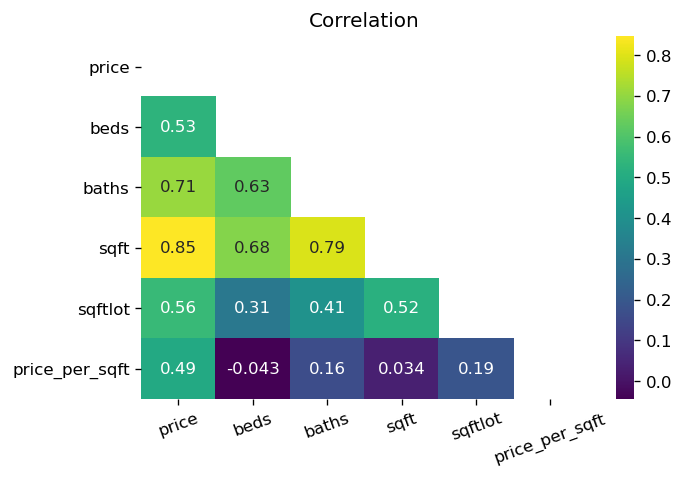

In [37]:

c = df8.drop(columns=['zip']).corr()
mask = np.triu(np.ones_like(c,dtype = bool))

plt.figure(dpi=120)
plt.title('Correlation')
sns.heatmap(c,mask=mask,cmap='viridis',annot=True)
plt.xticks(rotation=20)
plt.yticks(rotation =0)
plt.show()

In [38]:
df9 = df8.drop(columns=['price_per_sqft']).copy()

## Model

### Handle Categorical Features with One-Hot encoding

In [39]:
#for each row, "1" on the corresponding ZIP column and "0" on the other ZIP columns
dummies = pd.get_dummies(df9['zip'])
dummies.head()

,68007,68022,68028,68046,68102,68104,68105,68106,68107,68108,...,68136,68137,68138,68142,68144,68152,68154,68157,68163,68164
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
final_df = pd.concat([df9.drop(columns=['zip']),dummies],axis='columns')
final_df = final_df.reset_index(drop=True)
final_df

,price,beds,baths,sqft,sqftlot,68007,68022,68028,68046,68102,...,68136,68137,68138,68142,68144,68152,68154,68157,68163,68164
0,250000.0,2.0,3.0,2596.0,3485.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,90000.0,5.0,3.0,2201.0,7405.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,210000.0,3.0,1.5,1774.0,16552.8,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,175000.0,3.0,2.0,1436.0,8712.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,130000.0,2.0,1.0,840.0,5227.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089,332875.0,4.0,3.0,2450.0,7579.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2090,464485.0,3.0,2.5,3094.0,7405.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2091,475228.0,4.0,3.0,2960.0,14810.4,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2092,681565.0,4.0,4.0,3503.0,23086.8,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


#### I could remove one dummy column (as all "0" in the other dummy columns would indicate the dropped column) but it will be easier to manage the web app in the future if all dummy columns are present.

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [41]:
X = final_df.drop(columns=['price'])
y = final_df['price']

In [46]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=25)

### Decision Tree

In [52]:
dt = DecisionTreeRegressor()

In [53]:
dt_param = {
    'criterion' : ['mse','friedman_mse'], 'splitter': ['best','random']
}

In [54]:
dt_grid_search =  GridSearchCV(dt, dt_param, cv=cv, return_train_score=False)
dt_grid_search.fit(X,y)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=25, test_size=0.3, train_size=None),
             estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'splitter': ['best', 'random']})

In [55]:
dt_grid_search.best_score_, dt_grid_search.best_params_

(0.6643311283967291, {'criterion': 'friedman_mse', 'splitter': 'random'})

In [56]:
dt = DecisionTreeRegressor(splitter='random')

### Linear Regression

In [45]:
lr = LinearRegression()

In [47]:
lr_param = {
    'normalize': [True, False]
}

In [48]:
lr_grid_search =  GridSearchCV(lr, lr_param, cv=cv, return_train_score=False)
lr_grid_search.fit(X,y)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=25, test_size=0.3, train_size=None),
             estimator=LinearRegression(),
             param_grid={'normalize': [True, False]})

In [49]:
lr_grid_search.best_score_, lr_grid_search.best_params_

(0.764582922841837, {'normalize': True})

In [50]:
lr.fit(X,y)

LinearRegression()

## Exporting for deployment

In [ ]:
#saving model to pickle file
import pickle
with open('omaha_real_estate_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [ ]:
#saving dataframe columns for web app
import json
columns = {'data_columns' : [col for col in X.columns]}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))